In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import mnist # Importing the MNIST Data
from keras import utils

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the MNIST Data
# Dividing the data into train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


In [5]:
print(y_test.shape)

(10000,)


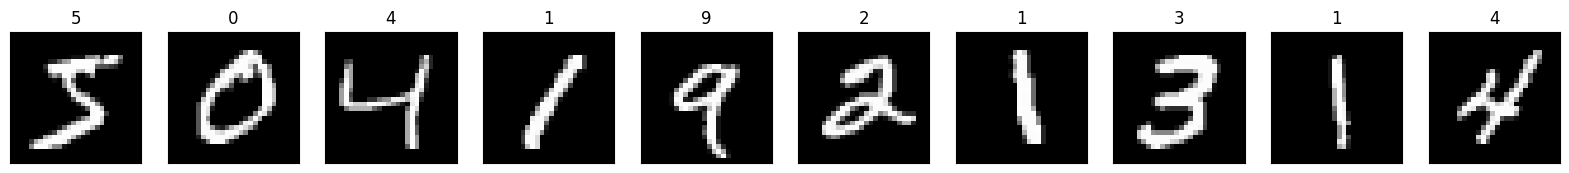

In [6]:
# Plot the first 10 images using imshow()
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [7]:
# Convert images to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
# Create a sequential model
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
model.add(Flatten(input_shape=(28, 28)))

# Adding a Dense layer with 10 neurons
model.add(Dense(10, activation='sigmoid'))

# Adding another Dense layer with 5 neurons
model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
model.add(Dense(10, activation='softmax'))

In [10]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


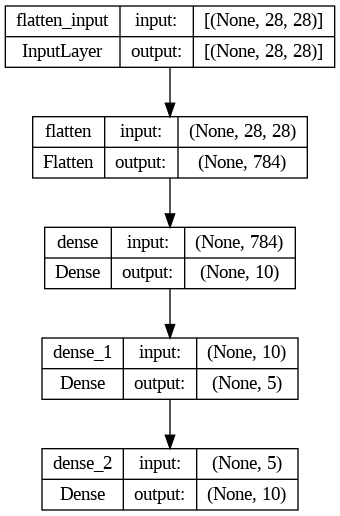

In [11]:
# Plot the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
# Fit the model with 20 epochs (as per your desktop configuration)
model_fitting = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.6961 - acc: 0.5211 - val_loss: 1.3043 - val_acc: 0.6421
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1207 - acc: 0.6725 - val_loss: 1.0053 - val_acc: 0.7111
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9248 - acc: 0.7242 - val_loss: 0.8548 - val_acc: 0.7542
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8342 - acc: 0.7532 - val_loss: 0.8026 - val_acc: 0.7612
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7920 - acc: 0.7597 - val_loss: 0.7193 - val_acc: 0.7893
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7643 - acc: 0.7768 - val_loss: 0.6894 - val_acc: 0.8102
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7291 - acc: 0.7866 - val_loss: 0.6826 - val_acc: 0.8191
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [16]:
print(model_fitting.history)

{'loss': [1.6960840225219727, 1.1206928491592407, 0.9248174428939819, 0.8341594338417053, 0.7920060157775879, 0.7643463015556335, 0.7291463613510132, 0.6964708566665649, 0.6923174262046814, 0.6515468955039978, 0.6555964350700378, 0.649884045124054, 0.647628664970398, 0.6208340525627136, 0.5992602705955505, 0.5910172462463379, 0.6092382073402405, 0.5867504477500916, 0.5954349040985107, 0.5745348930358887], 'acc': [0.5210666656494141, 0.6725166440010071, 0.7241666913032532, 0.7531999945640564, 0.7597000002861023, 0.7767500281333923, 0.7865999937057495, 0.8094333410263062, 0.8110666871070862, 0.8238333463668823, 0.8220999836921692, 0.8219333291053772, 0.8249833583831787, 0.8363500237464905, 0.8398500084877014, 0.8456500172615051, 0.8362166881561279, 0.8452000021934509, 0.8391500115394592, 0.8460999727249146], 'val_loss': [1.3043015003204346, 1.005259394645691, 0.8547852635383606, 0.8026421666145325, 0.7193217277526855, 0.6894388794898987, 0.6825958490371704, 0.7079904675483704, 0.63582122

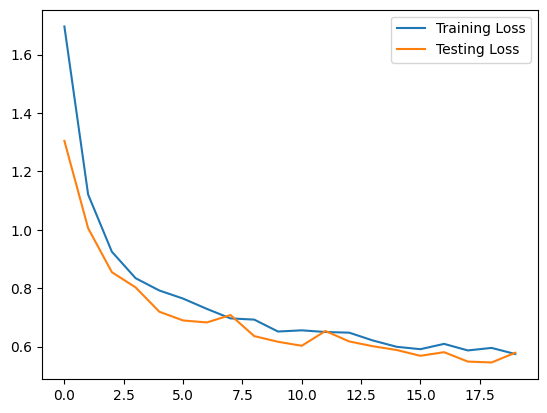

In [18]:
# Plot Training and Testing Loss

# Plotting the Traning loss
plt.plot(model_fitting.history['loss'], label='Training Loss')

# Plotting the Testing loss
plt.plot(model_fitting.history['val_loss'], label='Testing Loss')

plt.legend()

In [19]:
# Save the model in .h5 extension
model.save('mnist_model.h5')

In [20]:
# Load the model
import tensorflow as tf
model = tf.keras.models.load_model('mnist_model.h5')

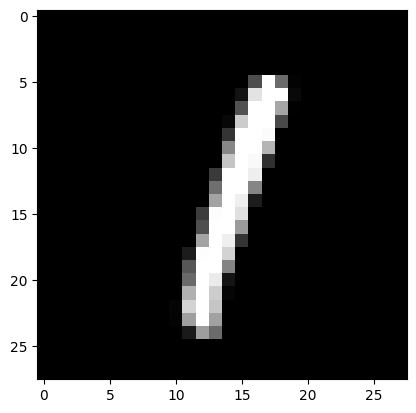

In [22]:
# Test the model
# Displaying the image from test data
plt.imshow(x_test[5], cmap='gray')

In [23]:
import numpy as np

x = np.reshape(x_test[5], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 [==============================] - 0s 189ms/step
1
